# ***Voorspellen van Diabetes***

Teamleden:
- Busse Heemskerk
- Declan van den Hoek
- Isa Dijkstra

In dit notebook worden er, aan de hand van een train dataset, verschillende Machine Learning modellen opgesteld om de meest accurate manier te vinden om diabetes te voorspellen.

#### **Het inladen van de datasets en importeren van libaries**

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
data_test = pd.read_csv('test_c.csv', sep = ',')
data_train = pd.read_csv('train_c.csv', sep = ',')

## **Explorative Data Analysis**

De minimale vereisten voor Machine Learning met Scikit Learn zijn:

- De data mag geen missende waardes hebben
- De data moet bestaan uit numerieke waardes
- De data moet in een dataframe staan

Omdat de data is ingelezen via Pandas staat het al in een Pandas DataFrame, hierdoor kan gebruik gemaakt worden van de .info() methode van DataFrames om te kijken naar missende waarden en de datatypen.

In [129]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p_id                      614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
 9   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


Zoals te zien is in het bovenstaande schema, vallen alle datatypen onder interger en float. Dit zijn de twee numerieke datatypen, dus aan deze voorwaarde is voldaan. De voorwaarde van missende waarden lijkt ook voldaan te zijn, maar voordat dit wordt bepaald duiken we eerst iets verder de data in.

In [130]:
data_train.describe()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.542345,3.809446,120.465798,68.903909,20.456026,81.250814,31.929642,0.468096,33.265472,0.342020
std,222.135103,3.375544,31.959619,19.933385,16.063105,116.947384,8.136791,0.329203,11.851427,0.474773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,194.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.238000,24.000000,0.000000
50%,380.500000,3.000000,115.000000,72.000000,23.000000,27.000000,32.150000,0.365500,29.000000,0.000000
75%,583.750000,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.628500,41.000000,1.000000
max,767.000000,15.000000,197.000000,114.000000,99.000000,744.000000,67.100000,2.420000,72.000000,1.000000


Aan de hand van de .describe() methode zijn alle basisstatistieken van de data getoond. Dit laat ons zien dat er waardes in het DataFrame staan die onlogisch zijn. Dit komt omdat waardes van de variabelen BloodPressure, Glucose, SkinThickness, Insulin en BMI onmogelijk nul kunnen zijn, tenzij de persoon overleden is. Om deze data beter te tonen doe we in de onderstaande cellen een deep-dive in de data van deze kolommen om te bepalen wat ermee moet gebeuren.

Eerst zal er worden gekeken naar de hoeveelheid nulwaarden in een kolom.

In [131]:
print('Nulwaarden Glucose:', 
      len(data_train[data_train['Glucose'] == 0]))

print('Nulwaarden BloodPressure:', 
      len(data_train[data_train['BloodPressure'] == 0]))

print('Nulwaarden SkinThickness:', 
      len(data_train[data_train['SkinThickness'] == 0]))

print('Nulwaarden Insulin:', 
      len(data_train[data_train['Insulin'] == 0]))

print('Nulwaarden BMI:', 
      len(data_train[data_train['BMI'] == 0]))

Nulwaarden Glucose: 4
Nulwaarden BloodPressure: 31
Nulwaarden SkinThickness: 184
Nulwaarden Insulin: 300
Nulwaarden BMI: 11


Het aantal nulwaarden dat aanwezig is in de kolommen Glucose, BloodPressure en BMI is laag, dit zorgt ervoor dat wij de rijen waar de nulwaarden in voorkomen kunnen verwijderen. Omdat het aantal minder dan 5% van de data is, is de impact van het verwijderen niet al te groot.

Echter zijn bij de kolommen SkinThickness en Insulin het aantal nulwaarden wel erg groot, om deze reden is er voor gekozen om de kolommen uit de dataset te verwijderen.

In [132]:
# Weghalen rijen met nulwaarden
df_train = data_train.copy()
df_train.drop(df_train[df_train['BMI'] == 0].index, inplace=True)
df_train.drop(df_train[df_train['Glucose'] == 0].index, inplace=True)
df_train.drop(df_train[df_train['BloodPressure'] == 0].index, inplace=True)

# Weghalen van kolommen wegens te hoog aantal nulwaarden
df_train.drop('Insulin', axis=1, inplace=True)
df_train.drop('SkinThickness', axis=1, inplace=True)
df_train.describe()

,p_id,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.542345,3.809446,120.465798,68.903909,31.929642,0.468096,33.265472,0.342020
std,222.135103,3.375544,31.959619,19.933385,8.136791,0.329203,11.851427,0.474773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,194.250000,1.000000,99.000000,62.000000,27.400000,0.238000,24.000000,0.000000
50%,380.500000,3.000000,115.000000,72.000000,32.150000,0.365500,29.000000,0.000000
75%,583.750000,6.000000,140.000000,80.000000,36.500000,0.628500,41.000000,1.000000
max,767.000000,15.000000,197.000000,114.000000,67.100000,2.420000,72.000000,1.000000


#### **Relaties tussen kolommen**

Bij het maken van een Machine Learning model is het belangrijk om te begrijpen hoe alle variabelen te maken hebben met elkaar, welke variabelen een impact hebben op de uitkomst en of er sprake is van multicollineariteit. Om te beginnen worden de correlaties tussen alle kolommen in het DataFrame df_train berekent.

In [133]:
correlaties = df_train.corr()
display(correlaties)

,p_id,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
p_id,1.000000,-0.059275,-0.011213,0.023523,-0.017562,-0.027020,-0.013576,-0.085877
Pregnancies,-0.059275,1.000000,0.126741,0.126405,0.014063,-0.022406,0.529585,0.222939
Glucose,-0.011213,0.126741,1.000000,0.178650,0.221062,0.162876,0.254656,0.475325
BloodPressure,0.023523,0.126405,0.178650,1.000000,0.304761,0.043960,0.230196,0.082771
BMI,-0.017562,0.014063,0.221062,0.304761,1.000000,0.124947,0.034714,0.272149
DiabetesPedigreeFunction,-0.027020,-0.022406,0.162876,0.043960,0.124947,1.000000,0.040877,0.182245
Age,-0.013576,0.529585,0.254656,0.230196,0.034714,0.040877,1.000000,0.233461
Outcome,-0.085877,0.222939,0.475325,0.082771,0.272149,0.182245,0.233461,1.000000


Voordat we de relaties verder gaan visualiseren, zal de kolom p_id worden verwijderd uit df_train. De correlatie is erg laag en de data bestaat om individuen te identificeren, het heeft dus geen invloed op de voorspellingen en zal niet langer nodig zijn.

In [134]:
df_train.drop('p_id', axis = 1, inplace=True)

Om de relaties tussen de kolommen beter duidelijk te maken word er hieronder gebruik gemaakt van verschillende visualisaties. Voor deze visualisaties zijn verschillende functies gemaakt.

In [135]:
def boxplots(df, kolom):
    """
    Maakt een aantal box plots gelijk aan het aantal kolommen in de Dataframe. De box zijn tegen één specifieke kolom opgezet, om de 
    verdeling t.o.v. die kolom te tonen.
    
    Parameters:
    ----------------
    df : Pandas DataFrame
        Een pandas DataFrame met kolommen waarvan je de verdeling wilt onderzoeken.
    
    kolom : str
        De naam van de kolom waarbij de verdeling bekeken word, ten opzichte van de andere kolommen.
        
    Returns:
    ---------------
    None :
        In plaats van iets te returnen laat de functie meerdere boxplots zien.
    """    
    #For-loop om elke kolom een eigen boxplot te geven
    for col in df.columns:
        #if-statement om te voorkomen dat de kolom-parameter ook een boxplot krijgt
        if col != kolom:
            #Zetten van de grootte van de plot
            plt.subplots(figsize=(15, 5))
            
            #Maken en benoemen van de assen van de boxplots
            sns.boxplot(x=kolom, y=col,
                        data=df, color='pink')
            plt.xlabel(kolom)
            plt.ylabel(col)
            plt.title('{} vs. {}'.format(kolom, col))
            plt.show()

def barplot(df, kolom):
    """
    Maakt een aantal bar plots gelijk aan het aantal kolommen in de Dataframe. De bar is tegen één specifieke kolom opgezet, om de 
    verdeling t.o.v. die kolom te tonen.
    
    Parameters:
    ----------------
    df : Pandas DataFrame
        Een pandas DataFrame met kolommen waarvan je de verdeling wilt onderzoeken.
    
    kolom : str
        De naam van de kolom waarbij de verdeling bekeken word, ten opzichte van de andere kolommen.
        
    Returns:
    ---------------
    None :
        In plaats van iets te returnen laat de functie meerdere barplots zien.
    """    
    #For-loop om elke kolom een eigen barplot te geven
    for col in df.columns:
        #if-statement om te voorkomen dat de kolom-parameter ook een barplot krijgt
        if col != kolom:
            #Zetten van de grootte van de plot
            plt.subplots(figsize=(15, 5))
            
            #Maken en benoemen van de assen van de barplot
            sns.barplot(x=kolom, y=col, data=df, color= 'skyblue')
            plt.xlabel(kolom)
            plt.ylabel(col)
            plt.title('{} vs. {}'.format(kolom, col))
            plt.show()

def histplot(df, kolom):
    """
    Maakt een aantal bar plots gelijk aan het aantal kolommen in de Dataframe. De bar is tegen één specifieke kolom opgezet, om de 
    verdeling t.o.v. die kolom te tonen.
    
    Parameters:
    ----------------
    df : Pandas DataFrame
        Een pandas DataFrame met kolommen waarvan je de verdeling wilt onderzoeken.
    
    kolom : str
        De naam van de kolom waarbij de verdeling bekeken word, ten opzichte van de andere kolommen.
        
    Returns:
    ---------------
    None :
        In plaats van iets te returnen laat de functie meerdere barplots zien.
    """    
    #For-loop om elke kolom een eigen barplot te geven
    for col in df.columns:
        #if-statement om te voorkomen dat de kolom-parameter ook een barplot krijgt
        if col != kolom:
            #Zetten van de grootte van de plot
            plt.subplots(figsize=(15, 5))
            
            #Maken en benoemen van de assen van de barplot
            sns.histplot(data=df, x=col, hue=kolom, kde=True)
            plt.xlabel(col)
            plt.ylabel('Aantal Waarnemingen')
            plt.title('Verdeling van {}'.format(col))
            plt.show()

Nu alle functies voor de grafieken zijn aangemaakt kunnen de visualisaties duidelijk achter elkaar worden getoond en besproken.

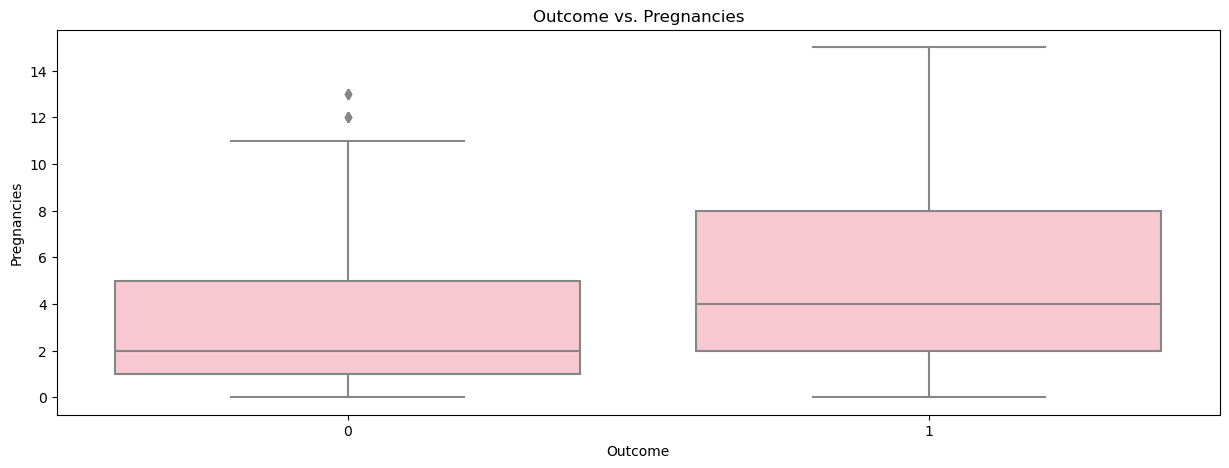

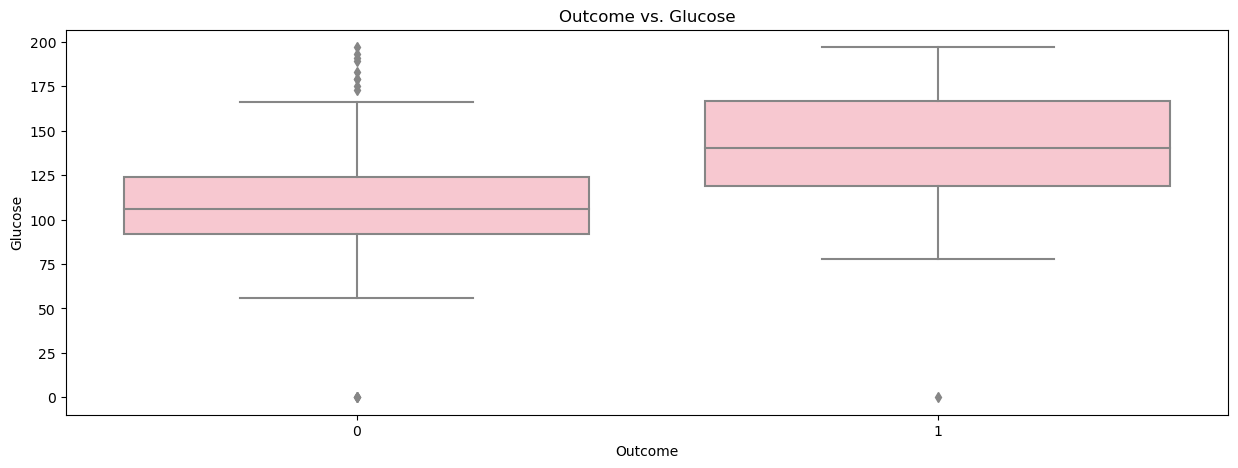

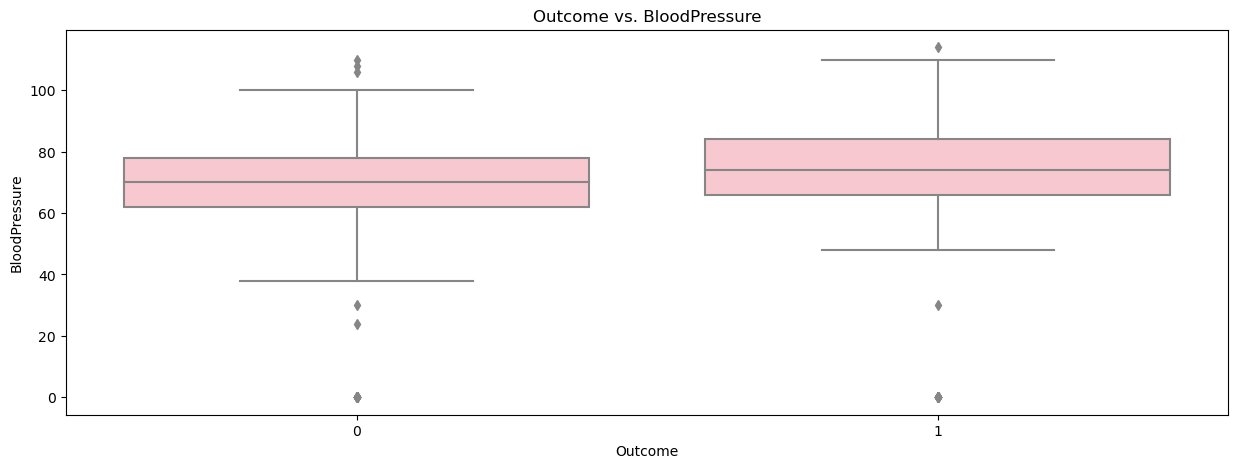

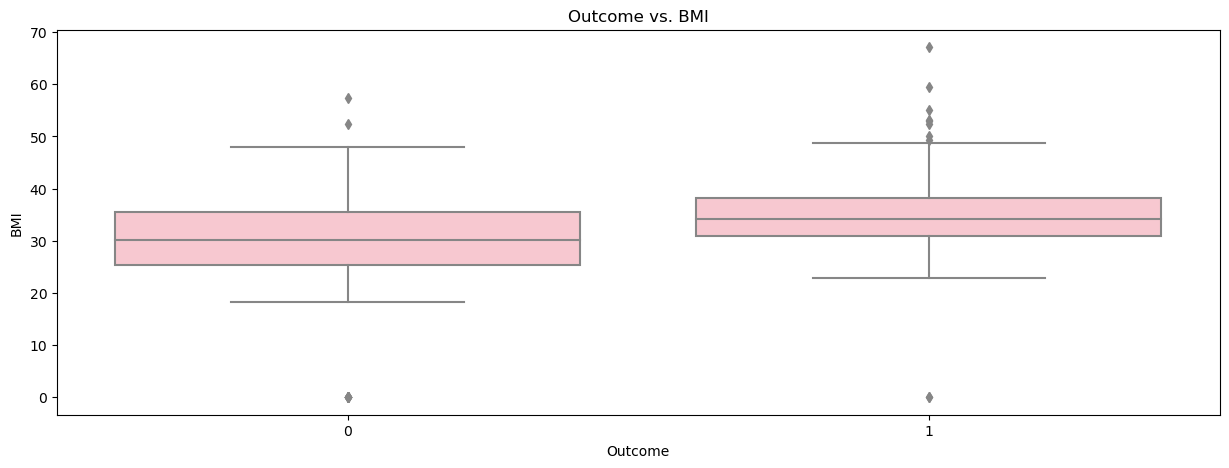

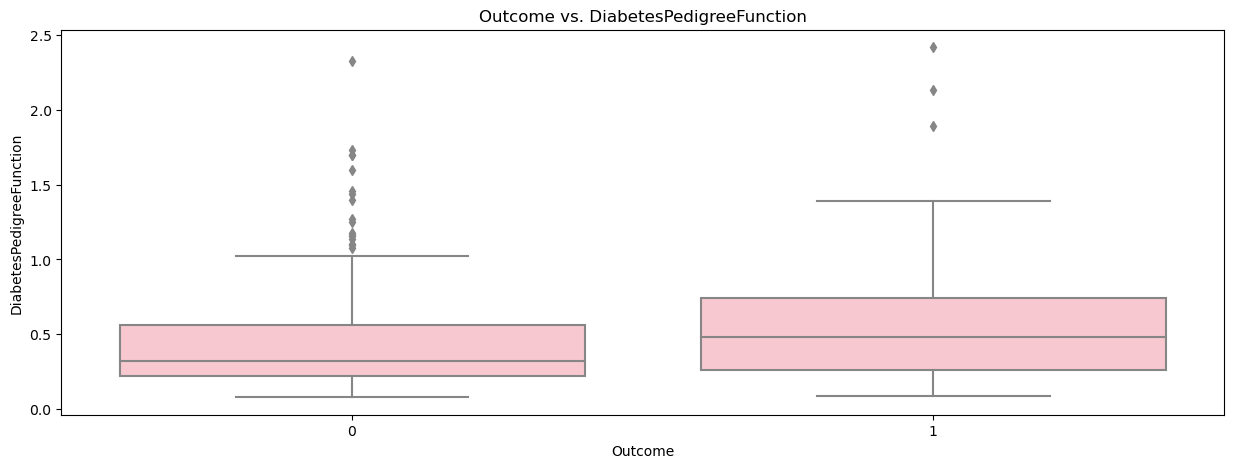

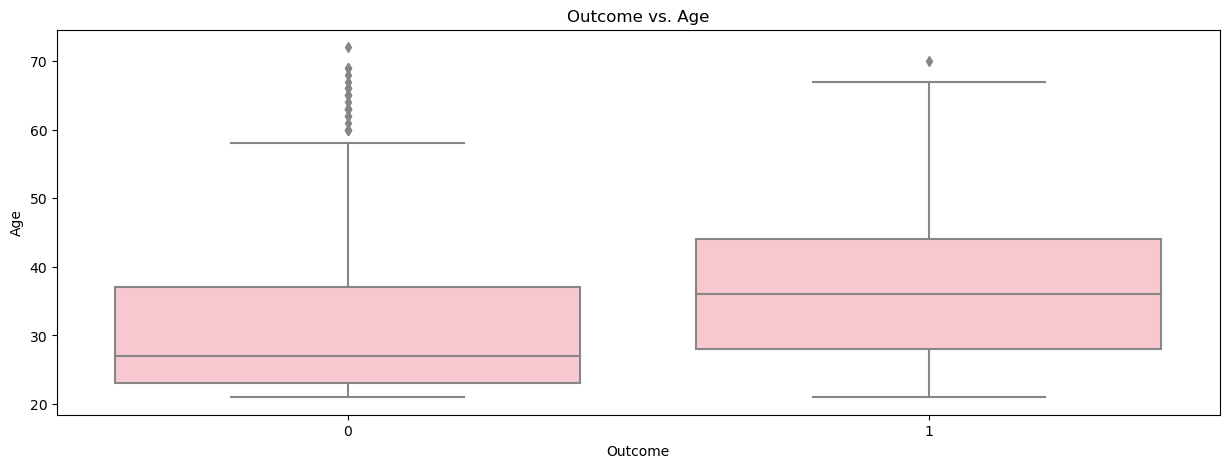

In [136]:
boxplots(df_train, 'Outcome')

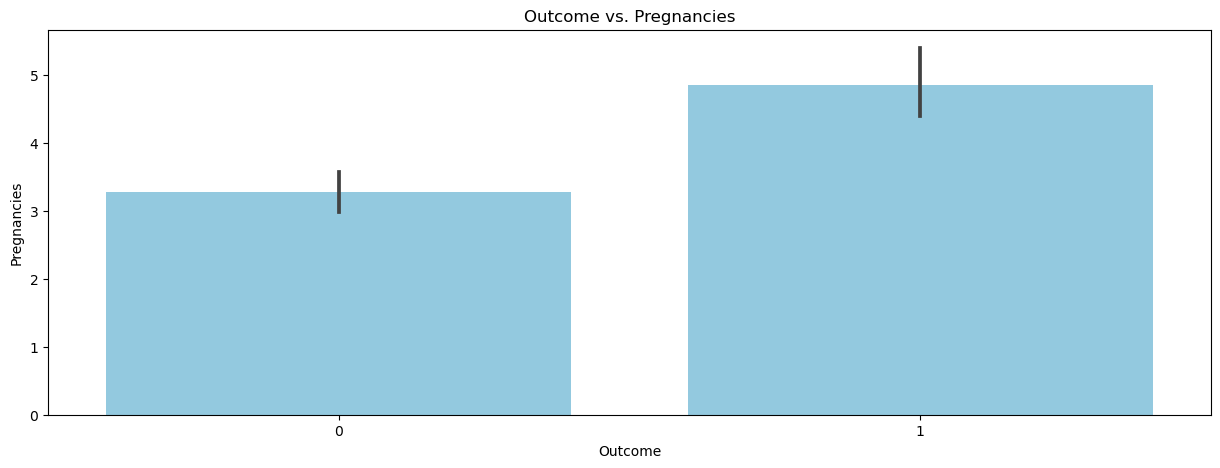

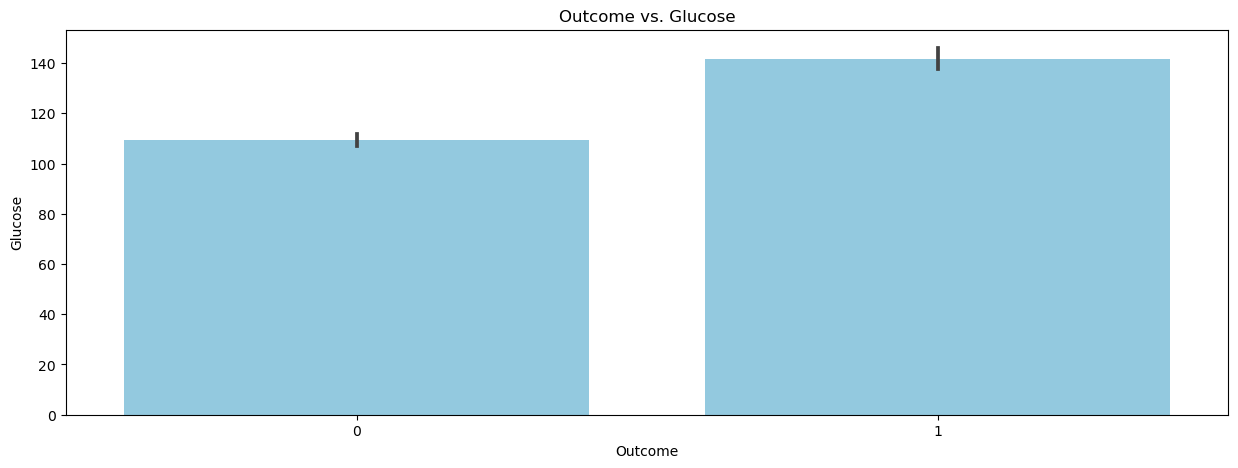

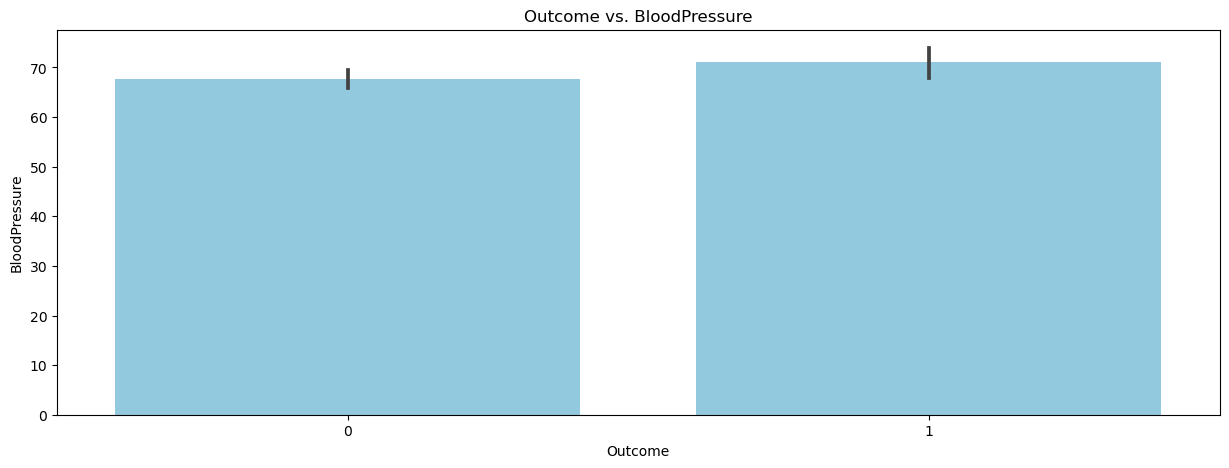

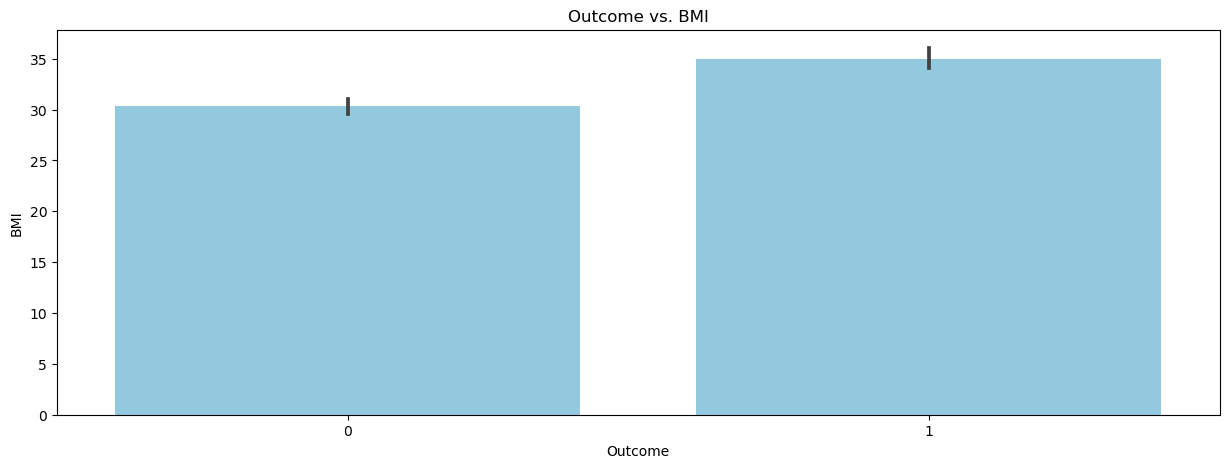

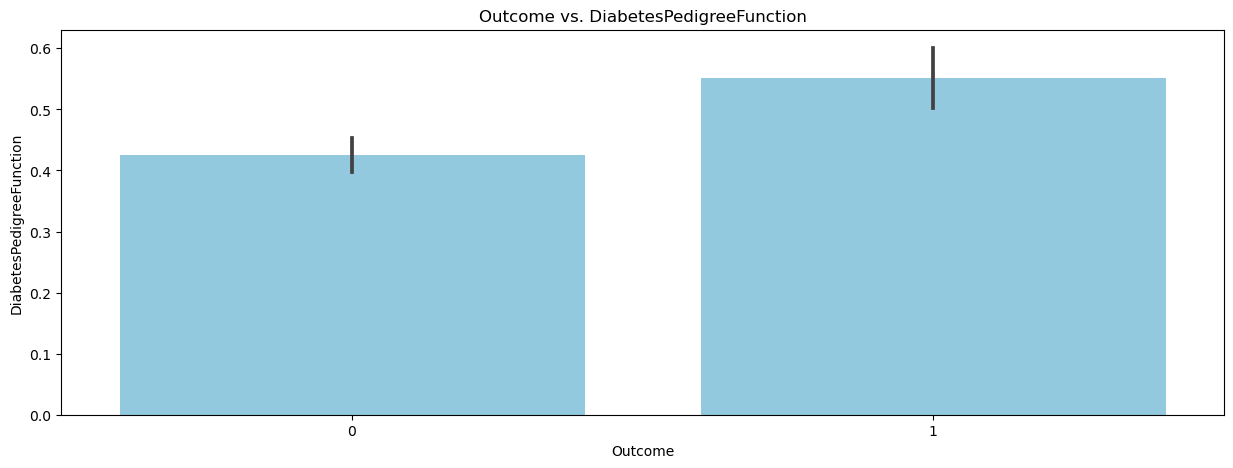

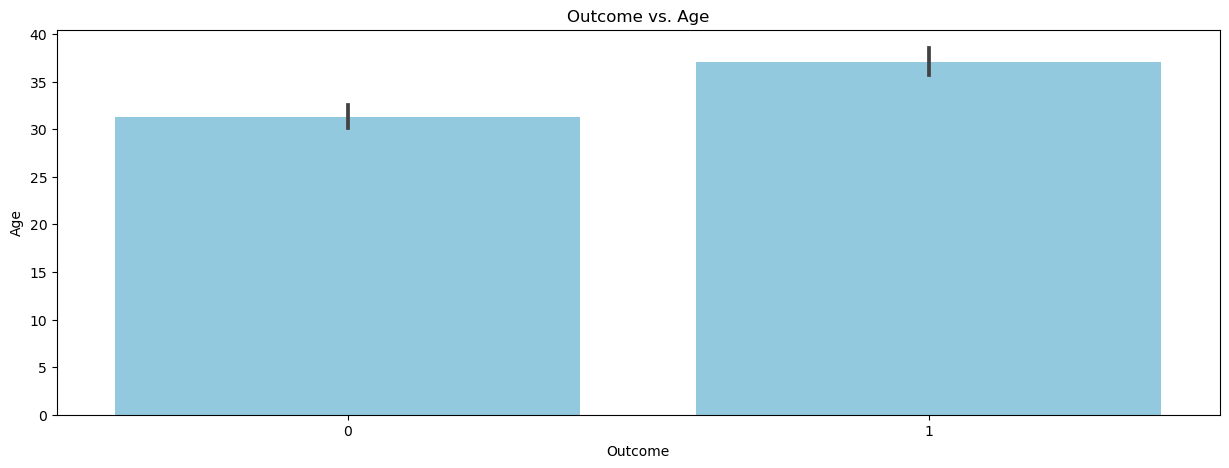

In [137]:
barplot(df_train, 'Outcome')

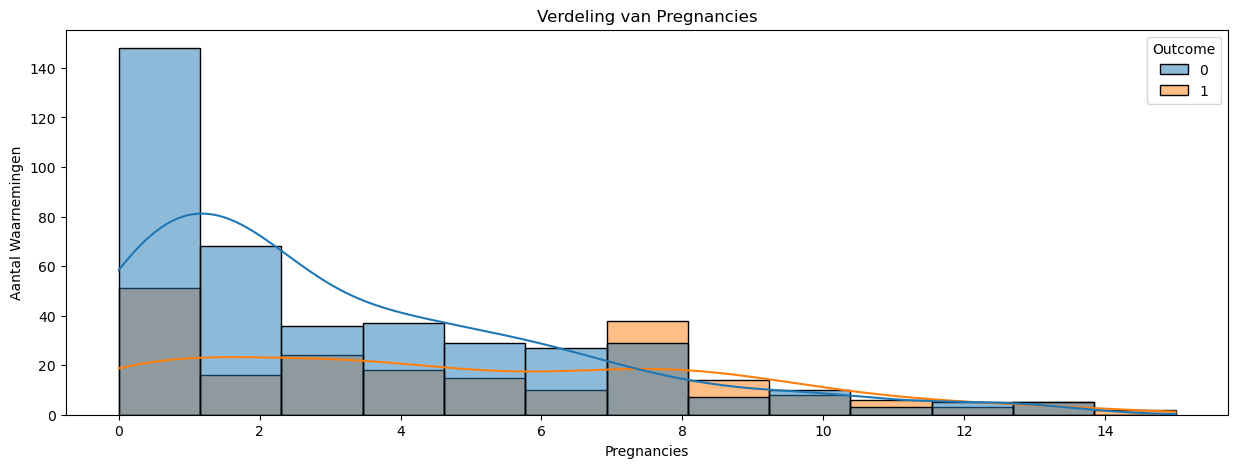

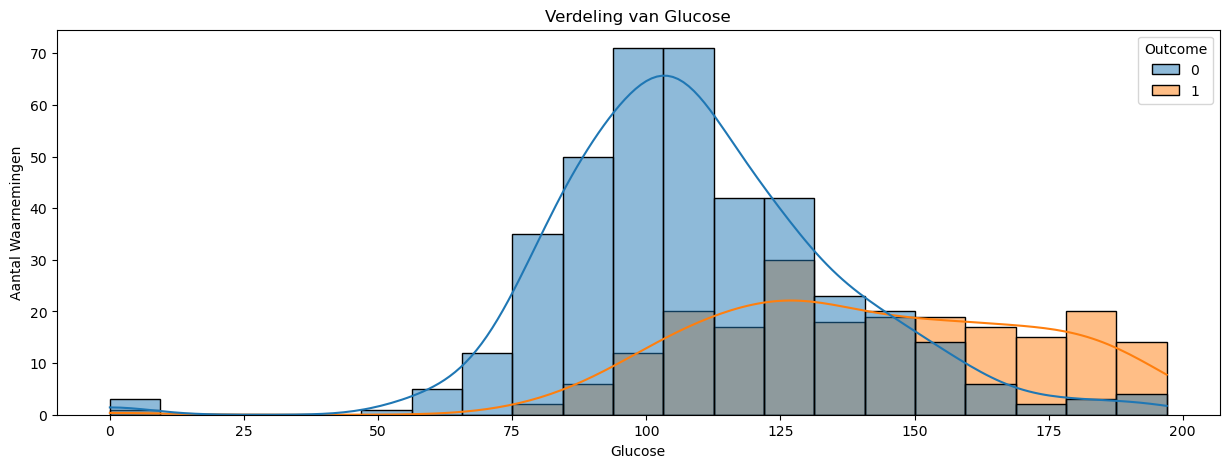

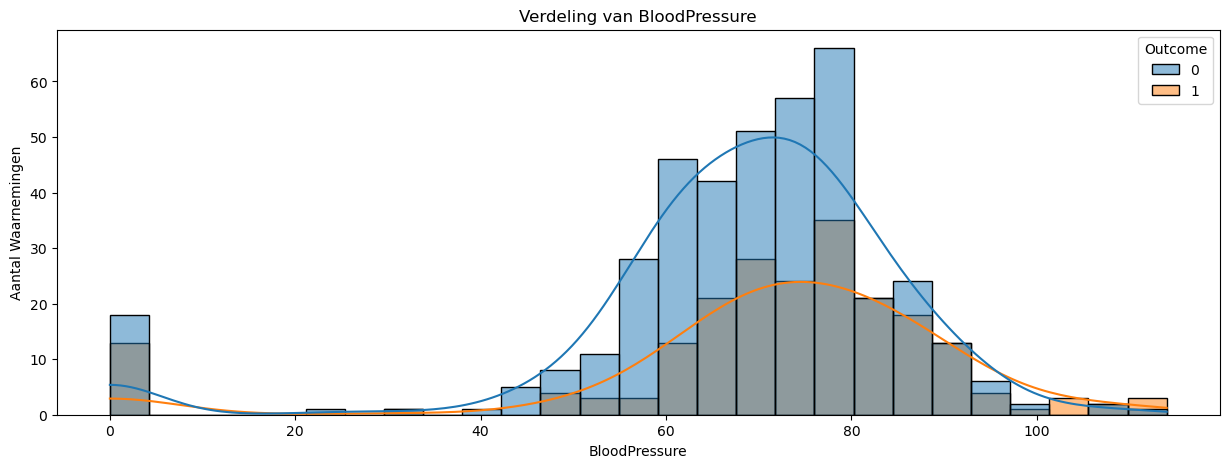

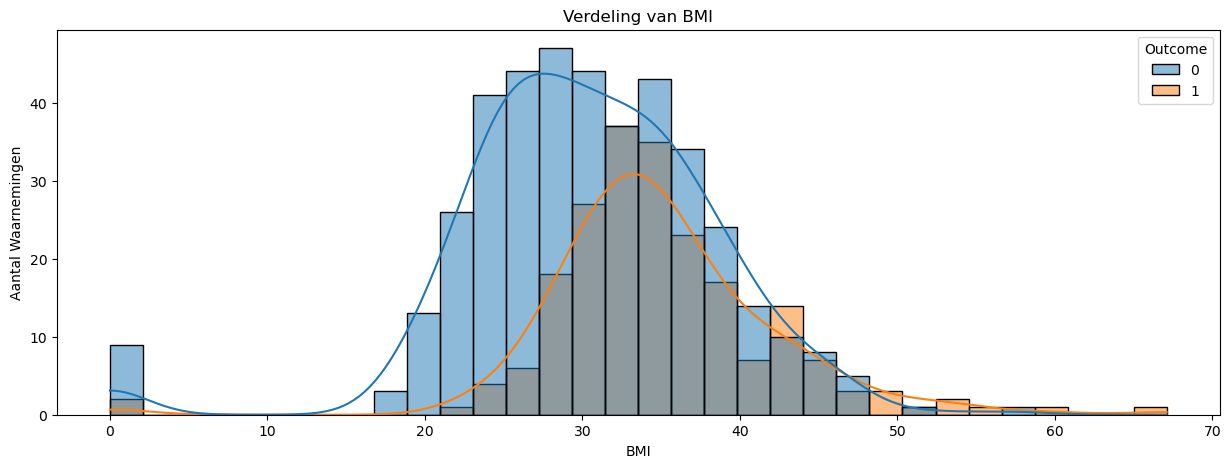

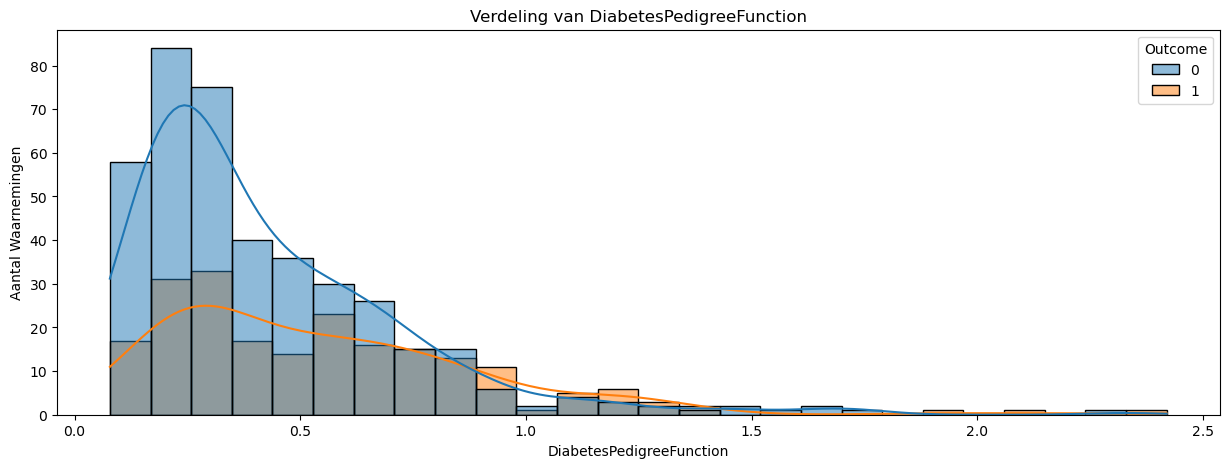

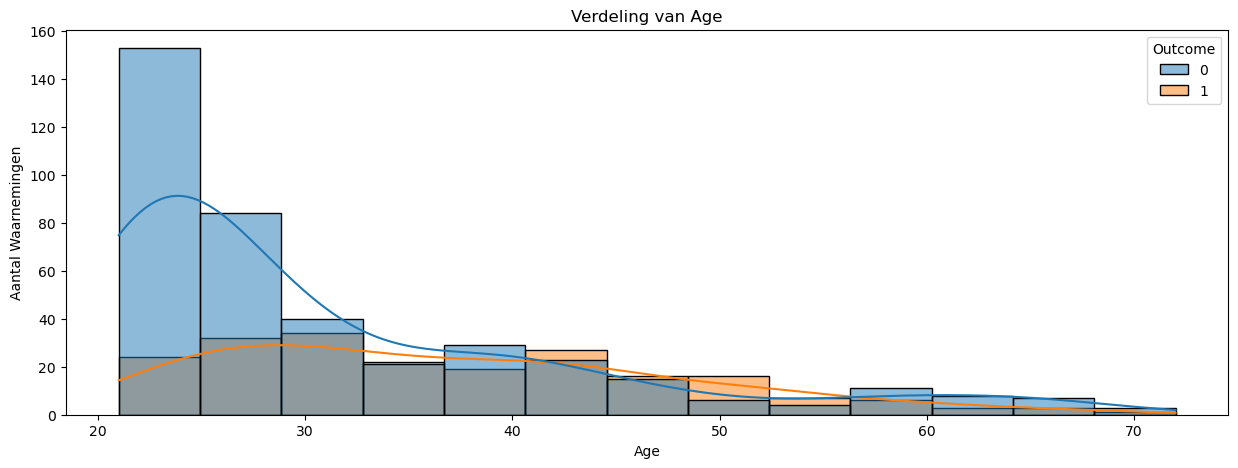

In [138]:
histplot(df_train, 'Outcome')

#### **Standaardisatie**

In een data science project, is de data standaardiseren een cruciaal onderdeel van het pre-processing van de data. In dit proces worden de variabelen omgezet in vergelijkbare schalen, zodat ze op dezelfde manier kunnen worden geïnterpreteerd en vergeleken. Als dit niet gebeurt, dan kan het model niet de juiste conclusies trekken.  

Standaardisatie heeft als hoofddoel om ervoor te zorgen dat de variabelen in een dataset vergelijkbaar zijn en op een consistente manier kunnen worden geïnterpreteerd. Hierdoor zijn analyses, modellering en visualisaties makkelijker, en het helpt bij het elimineren van vertekeningen veroorzaakt door verschillen in schaal of eenheden tussen variabelen. 

Veel machine learning algoritmen zijn gevoelig voor de schaal tussen variabelen in een dataset, door de data te standaardiseren kunnen de prestaties van een machine learning model worden verbeterd.  Als voorbeeld, een dataset die de variabelen “inkomen” en “leeftijd” bevat zal de variabele “inkomen” belangrijker beschouwen dan leeftijd omdat de schaal zoveel hoger is. Bij veel machine learning algoritmen is standaardiseren nodig, maar niet alle. Een decision-tree model is niet gevoelig voor hoge verschillen in de variabelen bijvoorbeeld. 

#### *Data standaardisatie in onze dataset* 

In onze dataset zijn de waardes redelijk vergelijkbaar, behalve de variabelen insuline en glucose. Insuline heeft een maximum van 744, en glucose 197. Terwijl de andere variabelen tussen de 10-100 liggen. Toevallig bevat Insuline zoveel missende waardes dat we ervoor hebben gekozen deze te verwijderen. Glucose aan de andere kant moet wel gestandaardiseerd worden wanneer we de machine learning modellen gaan toepassen.

In [139]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def feature_scaling(data, method='min-max', columns=None):

    if method not in ['min-max', 'standardization']:
        raise ValueError("Unsupported scaling method. Choose 'min-max' or 'standardization'.")

    if columns is None:
        numerical_columns = data.select_dtypes(include=['number']).columns
    else:
        numerical_columns = columns

    if method == 'min-max':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()

    scaled_data = data.copy()
    scaled_data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    return scaled_data

In [140]:
train_scaled = feature_scaling(df_train)
train_scaled.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.253963,0.611502,0.604420,0.475852,0.166565,0.240499,0.342020
std,0.225036,0.162232,0.174854,0.121264,0.140565,0.232381,0.474773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066667,0.502538,0.543860,0.408346,0.068318,0.058824,0.000000
50%,0.200000,0.583756,0.631579,0.479136,0.122758,0.156863,0.000000
75%,0.400000,0.710660,0.701754,0.543964,0.235056,0.392157,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## ***Machine Learning en Metrics***

#### *De vorm van Machine Learning*
Bij deze opdracht is er sprake van een classificatie. De target variabele, 'Outcome', heeft twee mogelijke waarden, dit zijn 0 of 1. De waarde 0 geeft aan dat het individu waarvan de data afkomstig is geen diabetes heeft, bij een waarde van 1 zou het individu wel diabetes hebben.

#### *De metrics van classificatie*
Bij een classificatie worden 4 verschillende metrics gebruikt: accuracy, precision, recall en f1-score. De accuracy is redelijk vanzelfsprekend, deze metric houdt het percentage waarden dat correct is voorspeld in. De andere drie metrics worden hieronder uitgelegd, met behulp van een confusion matrix.

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

class Classificatie:
    """ 
    Een class die gebruikt wordt om een voorspellend model te maken. 
    
    Atributes:
    ------------------
    df : DataFrame
        Het dataframe waar het model op gebruikt wordt.
        
    target : str
        Naam van de kolom die voorspelt wordt.
        
    Methods:
    ----------------
    model_knn(self, neighbors = 5, weights = 'uniform', leaf_size = 30, p = 2)
        Een method die het aantal waardes, het aantal goed voorspelde waardes en de accuratie uitprint.
        Dit gebeurt op basis van het Machine Learning model genaamd KNearestNeighbors.
    
    find_k(self, high_range, ylim_low = None, ylim_high = None)
        Een method die een lijngrafiek laat zien met de accuratie van de test en train voorspellingen bij verschillend aantal neighbors.
    
    model_logreg(self, c_value = 1.0, penalty = 'l2')
        Een method die het classification report returned. Dit rapport wordt gemaakt door de
        classification_report method van SKLearn en bevat o.a. de Precision, Recall en Accuracy.
    
    grid_search(self, param_grid, knn_or_log = 'knn')
        Een method die de beste parameters en de beste Cross Validation score berekent en vervolgens toont.
    """
    
    def __init__(self, df, target):
        """
        De constructor van de class. Deze maakt X en y aan om deze vervolgens
        te splitten in een train en test set voor het modelleren.
        
        Parameters:
        -------------------
        df : DataFrame
            Het dataframe waar het model op gebruikt wordt.
        
        target : str
            Naam van de kolom die voorspelt wordt.
        """
        
        self.X = df.drop(target, axis = 1)
        self.y = df[target]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, random_state = 42, test_size=0.3)
    
    def model_knn(self, neighbors = 5, weights = 'uniform', leaf_size = 30, p = 2):
        """
        Een method die het aantal waardes, het aantal goed voorspelde waardes en de accuratie uitprint.
        Dit gebeurt op basis van het Machine Learning model genaamd KNearestNeighbors.
        
        Parameters:
        -------------------
        neighbors : int
            Het aantal neighbors om de voorspelling van het model op te baseren.
    
        weights : str, default = 'uniform'
            Hoeveel een waarde meetelt.
        
        leaf_size : int, default = 30
            Verwijst naar het aantal gegevenspunten waarbij het algoritme overschakelt van een brute-force aanpak naar 
            een efficiënter algoritme om de dichtstbijzijnde neighbors te vinden.
        
        p : int, default = 2
            Vermogensparameter voor de Minkowski-metriek. Wanneer p = 1, komt dit overeen met het gebruik van 
            manhattan_distance (l1) en euclidische_distance (l2) voor p = 2.
            
        Returns:
        -------------------
        print : str
            Een string met daarin de waardes voor de voorspelling en de accuracy
        """
        
        #aanmaken knn model en fitten
        self.knn = KNeighborsClassifier(n_neighbors = neighbors, weights = weights, leaf_size = leaf_size, p = p)
        self.knn.fit(self.X_train, self.y_train)

        #voorspellingen opslaan in y_pred
        self.y_pred = self.knn.predict(self.X_test)
        
        #aanmaken df met voorspellingen en het verschil tussen de voorspelling
        self.df = pd.DataFrame({'y_test': self.y_test,
                                            'y_pred': self.y_pred,
                                            'verschil': self.y_test - self.y_pred})

        #aanmaken dif dataframe, waar de verschillende verschillen in voorspelling worden opgeteld
        self.dif = self.df['verschil'].value_counts().reset_index()
        self.dif.columns = ['verschil', 'frequentie']

        #aanmaken waardes correct en total
        self.correct = (self.df['verschil'] == 0).sum()
        self.total = len(self.df)

        #tonen accuracy
        self.acc = self.correct / self.total
        
        return print(f'Aantal waardes: {self.total} \
                            \nAantal correct: {self.correct} \
                            \nAccuracy: {round(self.acc, 2)}')
    
    def find_k(self, high_range, ylim_low = None, ylim_high = None):
        """
        Een method die een lijngrafiek laat zien met de accuratie van de test en train voorspellingen bij verschillend aantal neighbors.
        
        Parameters:
        -------------------
        high_range: int
            De het hoogste aantal waardes van k die je wilt onderzoeken.
    
        ylim_low: int, default = None
            De laagste waarde die y kan aannemen.
    
        ylim_high: int, default = None
            De hoogste waarde die y kan aannemen.
            
        Returns:
        -------------------
        None :
            Geeft inplaats van een return een grafiek weer, met daarin de 2 lijnen voor test en train acuuracy.
        
        """
        
        #aanmaken van 2 lege dictionaries om te vullen met accuracies m.b.v. for loop
        self.tr_acc = {}
        self.te_acc = {}
        neighbors = range(1, high_range)
        for n in neighbors:
            knn = KNeighborsClassifier(n_neighbors = n)
            knn.fit(self.X_train, self.y_train)
            self.tr_acc[n] = knn.score(self.X_train, self.y_train)
            self.te_acc[n] = knn.score(self.X_test, self.y_test)
            
        #plotten van de grafiek om te kijken welke k-waarde het beste is
        plt.figure(figsize=(15, 5))
        plt.title("KNN: Varying Number of Neighbors")
        plt.plot(neighbors, self.tr_acc.values(), label="Training Accuracy")
        plt.plot(neighbors, self.te_acc.values(), label="Testing Accuracy")
        plt.legend()
        plt.ylim(ymin = ylim_low, ymax = ylim_high)
        plt.xlabel("Number of Neighbors")
        plt.ylabel("Accuracy")
        plt.show()
    
    def lr(self, c_value = 1.0, penalty = 'l2', rapport = True):
        """
        Een method die het classification report returned. Dit rapport wordt gemaakt door de
        classification_report method van SKLearn en bevat o.a. de Precision, Recall en Accuracy.
        
        Parameters:
        -------------------
        c_value: float, default = 1.0
            Inverse van regularisatiekracht; moet een positieve floats zijn. Net als bij ondersteunende vectormachines, 
            specificeren kleinere waarden een sterkere regularisatie.
    
        penalty: str, default ='l2'
            Bepaald of er een penalty gebruikt wordt en welke er gekozen wordt.

        rapport: bool, default = True
            Met rapport geef je aan of je het classificatie rapport
            te zien wilt krijgen
            
        Returns:
        ------------------
        print : str
            Het rapport met daarin de waardes over hoe goed de voorspelling in elkaar zit.
        
        """
        
        #model aanmaken en fitten
        self.logreg = LogisticRegression(penalty = penalty, solver = 'liblinear', C = c_value, random_state = 42, max_iter = 500)
        self.logreg.fit(self.X_train, self.y_train)
        
        #berekenen y_hat en tonen classification rapport
        self.y_hat = self.logreg.predict(self.X_test)
        
        # optionele classification report
        if rapport is True:
            self.report = classification_report(self.y_test, self.y_hat)
            return print('Rapport:', self.report, sep='\n')
        else:
            return None
    
    def grid_search(self, param_grid, knn_or_log = 'knn'):
        """
        Een method die de beste parameters en de beste Cross Validation score berekent en vervolgens toont.
        
        Parameters:
        -------------------
        param_grid: dict
            Een dictionary waarin de keys de hyperparameter is die je wilt checken en de value is een list van waardes in de hyperparameter.        
    
        knn_or_log: str, default = 'knn'
            Bepaald welk type model gebruikt wordt.
            
        Returns:
        ------------------
            print : str
                In deze print zijn de beste parameters te vinden en de hoogste CV score
        """
        
        if knn_or_log == 'knn':
            #uitvoeren van GridSearch en fit
            grid = GridSearchCV(self.knn, param_grid, cv = 5, scoring = 'accuracy', return_train_score = True)
            grid.fit(self.X_train, self.y_train)

            return print(f'Beste parameters: {grid.best_params_} \
                              \nBeste Cross Validation score: {grid.best_score_}')
        
        elif knn_or_log == 'log':
            #uitvoeren van GridSearch en fit
            grid = GridSearchCV(self.logreg, param_grid, cv = 5, scoring = 'accuracy', return_train_score = True)
            grid.fit(self.X_train, self.y_train)

            return print(f'Beste parameters: {grid.best_params_} \
                              \nBeste test score: {grid.best_score_}')
        
        else:
            #raise error wanneer er geen log of knn is gegeven.
            raise ValueError(f'de waarde voor knn_or_log was {knn_or_log}, de enige mogelijkheden zijn knn of log.')
               
    def confusion_matrix(self):
        """
        Een functie die een confusionmatrix opsteld
        """

        # maken van de confusion matrix
        cm = confusion_matrix(self.y_test, self.y_hat)
        cmd = ConfusionMatrixDisplay(cm, display_labels=['No diabetes','Diabetes'])
        cmd.plot()
        plt.show()

        # Aangeven van de vakken voor berekening metrics
        TP = cm[1,1]
        TN = cm[0,0]
        FP = cm[0,1]
        FN = cm[1,0]

        # Berekenen van de metrics
        precision = TP / ( TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * precision * recall / (precision + recall)
        
        print(f"Precision: {precision}\n"\
              f"Recall: {recall}\n"\
              f"F1_score: {f1}")
        

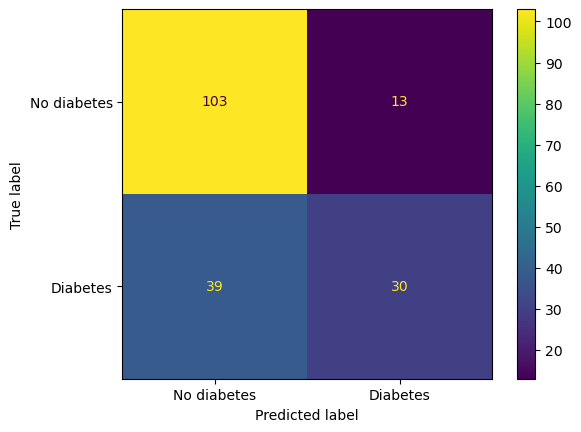

Precision: 0.6976744186046512
Recall: 0.43478260869565216
F1_score: 0.5357142857142857


In [142]:
model = Classificatie(train_scaled, 'Outcome')
model.lr(rapport=False)
model.confusion_matrix()

Zoals er te zien is in de Confusion Matrix, zijn er vier verschillende vlakken. Aan de hand van deze vier vlakken worden de metrics precision, recall en f1 berekend. De vier vlakken kunnen wisselen van locatie aan de hand van de context, ondanks het wisselen van locatie blijven de 4 vlakken wel met dezelfde namen. Deze namen zijn:
- True Positive (Uitkomsten tonen en zijn gewild)
- False Positive (Uitkomsten tonen zich als gewild, maar in de werkelijkheid zijn ze ongewild)
- True Negative (Uitkomsten tonen en zijn ongewild)
- False Negative (Uitkomsten tonen zich als ongewild, maar zijn in werkelijkheid gewild)

De precision metric is de bepaling van het deel positieve voorspellingen dat juist is voorspeld. Een hoge precision toont een laag aantal foutief positieve voorspellingen. De berekening ziet er als volgt uit: $\frac{TP}{(TP + FP)}$

De recall metric is de bepaling van het deel daadwerkelijk positieve uitkomsten dat juist is voorspeld. Een hoge recall toont aan dat het model weinig positieve gevallen over het hoofd ziet. De berekening ziet er als volgt uit: $\frac{TP}{(TP + FN)}$

De F1 score is een bepaling die zowel de precision als de recall in waarde neemt. Hierdoor geeft een hoge f1 score weer dat er op beide metrics goed is gescoord. De f1 score wordt bepaald door de volgende berekening: $ 2 * \frac{(Precision * Recall)}{(Precision + Recall)}$

#### *Welke metric?*

In ons geval willen we voorspellen of iemand diabetes heeft. Omdat diabetes vrij veel impact op de gezondheid van een persoon heeft, beredeneren wij dat het belangrijker is om zo min mogelijk voorspellingen te hebben die diabetes missen. In context van een confusion matrix, volgens ons zijn de false negatives belangrijker om te voorkomen dan de false positives. Op basis hiervan kiezen wij voor de metric recall. Met recall wordt gekeken hoeveel van de werkelijk positieve voorspelling correct zijn voorspeld. Als de recall hoog is, mist het model nauwelijks positieve gevallen.

## ***Modelleren***

In [143]:
model.model_knn()

Aantal waardes: 185                             
Aantal correct: 133                             
Accuracy: 0.72


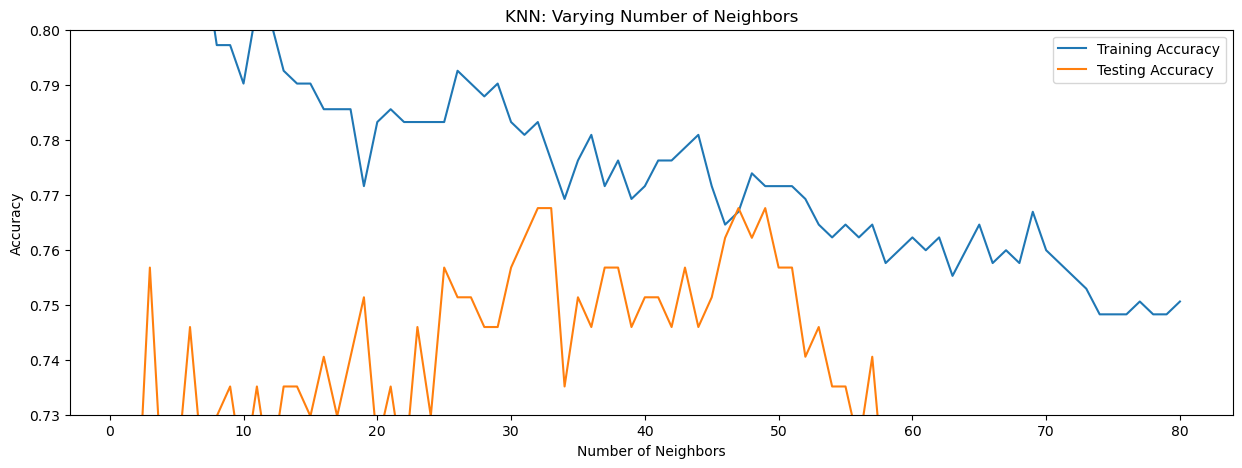

{1: 1.0,
 2: 0.8671328671328671,
 3: 0.8578088578088578,
 4: 0.8228438228438228,
 5: 0.8251748251748252,
 6: 0.8158508158508159,
 7: 0.8135198135198135,
 8: 0.7972027972027972,
 9: 0.7972027972027972,
 10: 0.7902097902097902,
 11: 0.8041958041958042,
 12: 0.8018648018648019,
 13: 0.7925407925407926,
 14: 0.7902097902097902,
 15: 0.7902097902097902,
 16: 0.7855477855477856,
 17: 0.7855477855477856,
 18: 0.7855477855477856,
 19: 0.7715617715617715,
 20: 0.7832167832167832,
 21: 0.7855477855477856,
 22: 0.7832167832167832,
 23: 0.7832167832167832,
 24: 0.7832167832167832,
 25: 0.7832167832167832,
 26: 0.7925407925407926,
 27: 0.7902097902097902,
 28: 0.7878787878787878,
 29: 0.7902097902097902,
 30: 0.7832167832167832,
 31: 0.7808857808857809,
 32: 0.7832167832167832,
 33: 0.7762237762237763,
 34: 0.7692307692307693,
 35: 0.7762237762237763,
 36: 0.7808857808857809,
 37: 0.7715617715617715,
 38: 0.7762237762237763,
 39: 0.7692307692307693,
 40: 0.7715617715617715,
 41: 0.7762237762237763,

{1: 0.6864864864864865,
 2: 0.7081081081081081,
 3: 0.7567567567567568,
 4: 0.7135135135135136,
 5: 0.7189189189189189,
 6: 0.745945945945946,
 7: 0.7189189189189189,
 8: 0.7297297297297297,
 9: 0.7351351351351352,
 10: 0.7189189189189189,
 11: 0.7351351351351352,
 12: 0.7189189189189189,
 13: 0.7351351351351352,
 14: 0.7351351351351352,
 15: 0.7297297297297297,
 16: 0.7405405405405405,
 17: 0.7297297297297297,
 18: 0.7405405405405405,
 19: 0.7513513513513513,
 20: 0.7243243243243244,
 21: 0.7351351351351352,
 22: 0.7189189189189189,
 23: 0.745945945945946,
 24: 0.7297297297297297,
 25: 0.7567567567567568,
 26: 0.7513513513513513,
 27: 0.7513513513513513,
 28: 0.745945945945946,
 29: 0.745945945945946,
 30: 0.7567567567567568,
 31: 0.7621621621621621,
 32: 0.7675675675675676,
 33: 0.7675675675675676,
 34: 0.7351351351351352,
 35: 0.7513513513513513,
 36: 0.745945945945946,
 37: 0.7567567567567568,
 38: 0.7567567567567568,
 39: 0.745945945945946,
 40: 0.7513513513513513,
 41: 0.75135135

In [144]:
model.find_k(81, 0.73, 0.8)
display(model.tr_acc, model.te_acc)

In [145]:
knn_param_grid = {'n_neighbors':[21, 52, 56, 67],
                  'weights': ['uniform', 'distance'],
                'leaf_size': [10, 20, 30, 40],
                        'p': [1, 2]}

model.grid_search(knn_param_grid, knn_or_log = 'knn')

Beste parameters: {'leaf_size': 10, 'n_neighbors': 52, 'p': 1, 'weights': 'uniform'}                               
Beste Cross Validation score: 0.7645690834473323


In [146]:
model.model_knn(neighbors=21, weights='distance', leaf_size=10, p=1)

Aantal waardes: 185                             
Aantal correct: 136                             
Accuracy: 0.74


In [150]:
# Weghalen rijen met nulwaarden
df_test = data_test.copy()

# Weghalen van kolommen wegens te hoog aantal nulwaarden
df_test.drop('Insulin', axis=1, inplace=True)
df_test.drop('SkinThickness', axis=1, inplace=True)

df_test.drop('p_id', axis = 1, inplace=True)

test_scaled = feature_scaling(df_test)
test_scaled.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.234530,0.616100,0.573025,0.445826,0.168873,0.202381
std,0.197227,0.161163,0.138465,0.215945,0.157059,0.190444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.498744,0.524590,0.277778,0.063452,0.050000
50%,0.176471,0.610553,0.581967,0.431746,0.126211,0.133333
75%,0.352941,0.706030,0.655738,0.605556,0.229926,0.316667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
X = train_scaled.drop('Outcome', axis=1)
y = train_scaled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 21, weights = 'distance', leaf_size = 10, p = 1)
knn.fit(X_train, y_train)

y_pred = knn.predict(test_scaled)
y_pred = y_pred.astype(int)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [149]:
test_predictions_df = pd.DataFrame({'p_id': data_test['p_id'], 'Outcome': y_pred})
#test_predictions_df.to_csv('voorspelling_KNN.csv', index=False)